In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
input_dim = x_train.shape[1]
encoding_dim = 32

In [11]:
np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

array([[-1.76195689,  1.48797145,  1.04442564, ..., -1.79192293,
         0.9367762 ,  0.20536036],
       [ 2.46912278, -1.27593388, -0.26273341, ..., -0.32330267,
         0.22097059,  0.21989785],
       [ 0.52009165, -0.27609739, -0.27896573, ...,  0.44961538,
        -0.97000456,  0.7099009 ],
       ...,
       [-0.39321786,  0.31837882,  1.55602573, ...,  0.12672056,
        -0.12726409, -0.074722  ],
       [ 1.48415802, -0.8615983 ,  0.41770467, ...,  0.83248204,
        -0.04084473,  0.21397316],
       [ 1.08549609, -0.2482213 , -0.20024725, ...,  0.35963623,
        -1.27500031, -0.39013853]])

In [12]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [29]:
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)

In [30]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 4967.2568 - val_loss: 4209.5337
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 4095.3364 - val_loss: 3972.7612
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 3870.3843 - val_loss: 3761.4431
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 3648.0149 - val_loss: 3507.4751
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 3394.7979 - val_loss: 3268.5652
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 3171.2839 - val_loss: 3041.1206
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 2947.0774 - val_loss: 2831.7229
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 2775.2026 - val_loss: 2685.2261
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 2644.4861 - val_loss: 2560.5798
Epoch 10/10
235/235 [========================

313/313 [==============================] - 1s 2ms/step


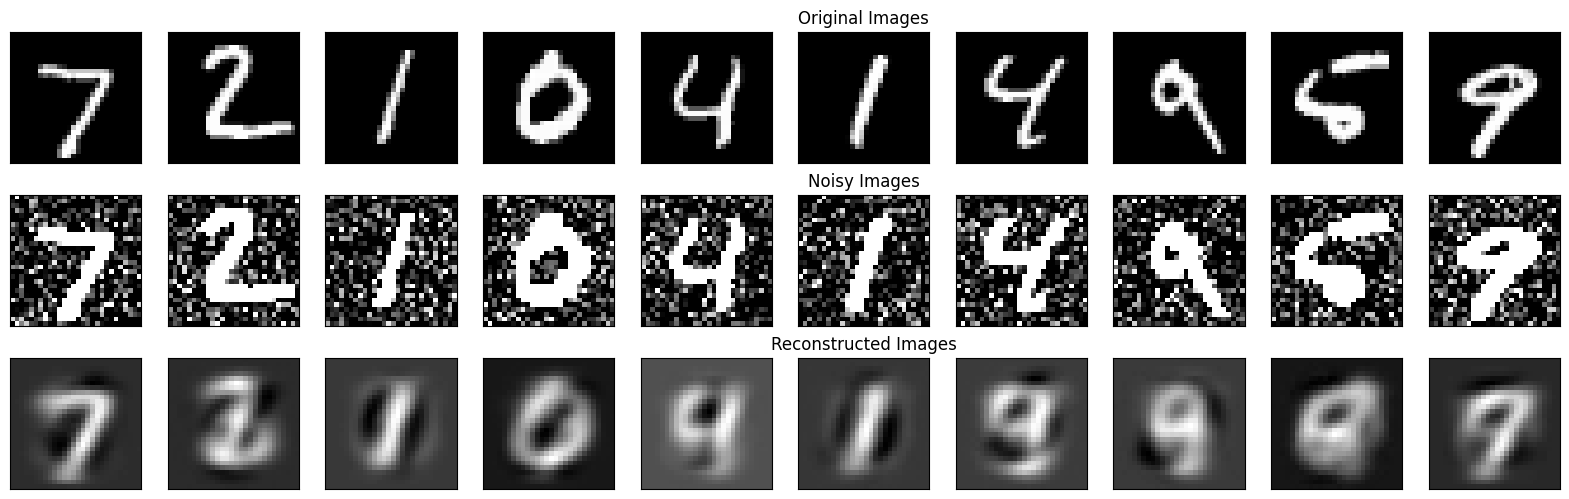

In [32]:
# Encode and decode some images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Reconstructed Images')
plt.show()
